In [ ]:
# dont run old one
# Importing libraries for data preprocessing
"""
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

# load all images in a directory into memory
def load_images(path, size=(256,512)):
    src_list = list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path):
        # load and resize the image
        pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # split into sketch and real images
        real_img, sketch_img = pixels[:, :256], pixels[:, 256:]
        src_list.append(sketch_img)
        tar_list.append(real_img)
    return [asarray(src_list), asarray(tar_list)]
 
# dataset path
path = 'preprocessed_dataset/train_white_sketches/'
# load dataset
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)
# save as compressed numpy array
filename = 'whitetrainfacesnp.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)
"""

: 

In [8]:
#useless chatgpt code to load images from directroy dont use doesnt work
#function to load all images return as numpy array
"""
from os import listdir
from keras.preprocessing.image import load_img, img_to_array
from numpy import asarray

def load_images_from_directory(path, size=(256, 256)):
    image_list = list()  # List to store images

    # Enumerate filenames in directory, assume all are images
    
    for filename in listdir(path):
        # Construct full file path
        file_path = path.rstrip('/') + '/' + filename
        
        try:
            # Load and resize the image
            img = load_img(file_path, target_size=size)
            # Convert to numpy array
            img_array = img_to_array(img)
            
            # Append the numpy array of the image to the list
            image_list.append(img_array)
        
        except Exception as e:
            print(f"Error loading {filename}: {e}")
    
    # Convert list of images to a numpy array
    return asarray(image_list)
"""

: 

In [125]:
#another code from chatgpt this one works
from os import listdir
from keras.preprocessing.image import load_img, img_to_array
from numpy import asarray

def load_images(sketch_path, real_path, size=(256, 256)):
    src_list = list()  # List to store sketch images
    tar_list = list()  # List to store real images

    # Enumerate filenames in the sketch directory
    for filename in listdir(sketch_path):
        # Construct full file paths for both sketch and real images
        sketch_file_path = sketch_path.rstrip('/') + '/' + filename
        real_file_path = real_path.rstrip('/') + '/' + filename
        
        try:
            # Load and resize the sketch image
            sketch_img = load_img(sketch_file_path, target_size=size)
            sketch_img_array = img_to_array(sketch_img)
            
            # Load and resize the real image
            real_img = load_img(real_file_path, target_size=size)
            real_img_array = img_to_array(real_img)
            
            # Append the images to their respective lists
            src_list.append(sketch_img_array)
            tar_list.append(real_img_array)
        
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    # Convert lists to numpy arrays
    return [asarray(src_list), asarray(tar_list)]


In [126]:
import tensorflow as tf
import glob
import os
import numpy as np

def load_images(src_dir, tar_dir, size=(256, 256), num_images=None):
    # Initialize lists to store images
    src_images = []
    tar_images = []
    
    # Load the image paths from the source and target directories
    src_image_paths = sorted(glob.glob(os.path.join(src_dir, '*.jpg')))  # Adjust the extension if needed
    tar_image_paths = sorted(glob.glob(os.path.join(tar_dir, '*.jpg')))  # Adjust the extension if needed

    # If num_images is provided, slice the lists to limit the number of images
    if num_images is not None:
        src_image_paths = src_image_paths[:num_images]
        tar_image_paths = tar_image_paths[:num_images]
    
    # Load and resize the images
    for src_path, tar_path in zip(src_image_paths, tar_image_paths):
        # Read the image from the file
        src_image = tf.io.read_file(src_path)
        tar_image = tf.io.read_file(tar_path)

        # Decode the images (JPEG format)
        src_image = tf.image.decode_jpeg(src_image, channels=3)
        tar_image = tf.image.decode_jpeg(tar_image, channels=3)

        # Resize the images
        src_image = tf.image.resize(src_image, size)
        tar_image = tf.image.resize(tar_image, size)
        
        # Convert TensorFlow tensors to NumPy arrays
        src_image = src_image.numpy()
        tar_image = tar_image.numpy()

        # Append the images to the lists
        src_images.append(src_image)
        tar_images.append(tar_image)
    
    # Convert the list of NumPy arrays to a single NumPy array
    return np.array(src_images), np.array(tar_images)

# Now call the function like this:
src_images, tar_images = load_images('sketch', 'celeba', size=(256, 256), num_images=4997)


In [15]:
#full size dont run
#src_images, tar_images = load_images('sketch', 'celeba', size=(256, 256))


: 

In [127]:
#slicing full size
reduced_src_images = src_images
reduced_tar_images=tar_images
reduced_src_images.shape

(4997, 256, 256, 3)

In [9]:
# load the prepared dataset
"""
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('whitetrainfacesnp.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()
"""

FileNotFoundError: [Errno 2] No such file or directory: 'whitetrainfacesnp.npz'

In [24]:
"""
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from tensorflow.keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add downsampling layer
    g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # conditionally add batch normalization
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    # leaky relu activation
    g = LeakyReLU(alpha=0.2)(g)
    return g
 
# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # add upsampling layer
    g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    # add batch normalization
    g = BatchNormalization()(g, training=True)
    # conditionally add dropout
    if dropout:
        g = Dropout(0.5)(g, training=True)
    # merge with skip connection
    g = Concatenate()([g, skip_in])
    # relu activation
    g = Activation('relu')(g)
    return g
 
# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # image input
    in_image = Input(shape=image_shape)
    # encoder model
    e1 = define_encoder_block(in_image, 64, batchnorm=False)
    e2 = define_encoder_block(e1, 128)
    e3 = define_encoder_block(e2, 256)
    e4 = define_encoder_block(e3, 512)
    e5 = define_encoder_block(e4, 512)
    e6 = define_encoder_block(e5, 512)
    e7 = define_encoder_block(e6, 512)
    # bottleneck, no batch norm and relu
    b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
    b = Activation('relu')(b)
    # decoder model
    d1 = decoder_block(b, e7, 512)
    d2 = decoder_block(d1, e6, 512)
    d3 = decoder_block(d2, e5, 512)
    d4 = decoder_block(d3, e4, 512, dropout=False)
    d5 = decoder_block(d4, e3, 256, dropout=False)
    d6 = decoder_block(d5, e2, 128, dropout=False)
    d7 = decoder_block(d6, e1, 64, dropout=False)
    # output
    g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
    out_image = Activation('tanh')(g)
    # define model
    model = Model(in_image, out_image)
    return model
"""

In [104]:
"""
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms

class Discriminator(nn.Module):
    def __init__(self, image_shape):
        super(Discriminator, self).__init__()
        self.image_shape = image_shape
        # Define layers
        self.conv1 = nn.Conv2d(6, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1)
        self.conv5 = nn.Conv2d(512, 512, kernel_size=4, stride=1, padding=1)
        self.conv6 = nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=1)
        
        # BatchNorm layers
        self.batch_norm2 = nn.BatchNorm2d(128)
        self.batch_norm3 = nn.BatchNorm2d(256)
        self.batch_norm4 = nn.BatchNorm2d(512)
        self.batch_norm5 = nn.BatchNorm2d(512)
        
        # LeakyReLU activations
        self.lrelu = nn.LeakyReLU(0.2, inplace=True)
        # Sigmoid for output
        self.sigmoid = nn.Sigmoid()

    def forward(self, src_image, tar_image):
        x = torch.cat([src_image, tar_image], dim=1)  # Concatenate along channels
        x = self.lrelu(self.conv1(x))
        x = self.lrelu(self.batch_norm2(self.conv2(x)))
        x = self.lrelu(self.batch_norm3(self.conv3(x)))
        x = self.lrelu(self.batch_norm4(self.conv4(x)))
        x = self.lrelu(self.batch_norm5(self.conv5(x)))
        x = self.conv6(x)
        return self.sigmoid(x)
        """

In [105]:
class Generator(nn.Module):
    def __init__(self, image_shape):
        super(Generator, self).__init__()
        self.image_shape = image_shape
        # Define layers for the generator (example architecture)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.deconv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.deconv2 = nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1)

        self.lrelu = nn.LeakyReLU(0.2, inplace=True)

    def forward(self, x):
        x = self.lrelu(self.conv1(x))
        x = self.lrelu(self.conv2(x))
        x = self.lrelu(self.deconv1(x))
        x = self.deconv2(x)  
        return x


In [6]:
# Define the GAN Model
class GAN(nn.Module):
    def __init__(self, g_model, d_model):
        super(GAN, self).__init__()
        self.generator = g_model
        self.discriminator = d_model

    def forward(self, x):
        gen_output = self.generator(x)
        dis_output = self.discriminator(x, gen_output)
        return dis_output, gen_output


In [7]:
# Load real samples
def load_real_samples(filename):
    data = np.load(filename)
    X1, X2 = data['arr_0'], data['arr_1']
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

In [8]:
# Generate real samples for training
def generate_real_samples(dataset, n_samples):
    trainA, trainB = dataset
    ix = np.random.randint(0, trainA.shape[0], n_samples)
    X1, X2 = trainA[ix], trainB[ix]
    y = np.ones((n_samples, 1, 1, 1))
    return [X1, X2], y

In [40]:
# Generate fake samples from the generator
def generate_fake_samples(g_model, samples):
    samples = torch.Tensor(samples)
    print(samples.shape)
    X = g_model(samples)
    y = np.zeros((len(X), 1, 1, 1))
    return X, y


In [54]:
# Training loop

def train(d_model, g_model, gan_model, dataset, n_epochs=1, n_batch=1):
    criterion = nn.BCELoss() 
    d_optimizer = optim.Adam(d_model.parameters(), lr=0.0002, betas=(0.5, 0.999))
    g_optimizer = optim.Adam(g_model.parameters(), lr=0.0002, betas=(0.5, 0.999))
    trainA, trainB = dataset
    batch_per_epoch = int(len(trainA) / n_batch)
    n_steps = batch_per_epoch * n_epochs
    for i in range(n_steps):
        [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch)
        print("X realA")
        print(type(X_realA))
        print(X_realA.shape)
        print("x real b")
        print(type(X_realB))
        print(X_realB.shape)
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA)
        print("x fake b")
        print(type(X_fakeB))
        print(X_fakeB.shape)
        print("y fake")
        print(type(y_fake))
        print(y_fake.shape)
        print("y real")
        print(type(y_real))
        print(y_real.shape)
        # Convert to tensors
        X_realA = torch.Tensor(X_realA)
        X_realB = torch.Tensor(X_realB)
        X_fakeB = torch.Tensor(X_fakeB)
        y_real = torch.Tensor(y_real)
        y_fake = torch.Tensor(y_fake)

        d_optimizer.zero_grad()
        g_optimizer.zero_grad()

        # Train discriminator with real samples
        real_pred = d_model(X_realA, X_realB)
        real_pred = real_pred.view(-1)  # Flatten to match y_real shape (for BCEWithLogitsLoss)
        y_real = y_real.view(-1) 
        d_loss_real = criterion(real_pred, y_real) #bce loss for real images
        
        fake_pred = d_model(X_realA, X_fakeB)
        fake_pred = fake_pred.view(-1)  # Flatten to match y_fake shape
        y_fake = y_fake.view(-1)   # Discriminator output for fake images
        d_loss_fake = criterion(fake_pred, y_fake) # bce loss for fake images
        
        #total d loss
        d_loss = (d_loss_real + d_loss_fake) / 2

        #train generator
        g_pred = d_model(X_realA, X_fakeB) 
        g_pred = g_pred.view(-1) # Discriminator output for fake images
        g_loss = criterion(g_pred, y_real.view(-1))  # fake to be classified as real

        # Backpropagate and optimize
        d_loss.backward()
        d_optimizer.step()
            
        g_loss.backward()
        g_optimizer.step()
        

        print(f'>Epoch [{i+1}/{n_steps}], D loss: {d_loss.item()}, G loss: {g_loss.item()}')

In [95]:
"""
reduced_src_images = np.transpose(reduced_src_images, (0, 3, 1, 2))  # Convert to (N, C, H, W)
reduced_tar_images = np.transpose(reduced_tar_images, (0, 3, 1, 2))  # Convert to (N, C, H, W)
reduced_src_images = (reduced_src_images - 127.5) / 127.5
reduced_tar_images = (reduced_tar_images - 127.5) / 127.5


dataset = (reduced_src_images, reduced_tar_images)"""

In [94]:
#reduced_src_images.shape

(256, 4997, 3, 256)

In [12]:
# load image data
"""
dataset = load_real_samples('whitetrainfacesnp.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
train(d_model, g_model, gan_model, dataset)
"""

FileNotFoundError: [Errno 2] No such file or directory: 'whitetrainfacesnp.npz'

In [ ]:
#our code
"""
image_shape = (256, 256, 3)
d_model = Discriminator(image_shape)
g_model = Generator(image_shape)
gan_model = GAN(g_model, d_model)
# train model

train(d_model, g_model, gan_model, dataset, n_epochs=1, n_batch=1)"""

X realA
<class 'numpy.ndarray'>
(1, 3, 256, 256)
x real b
<class 'numpy.ndarray'>
(1, 3, 256, 256)
torch.Size([1, 3, 256, 256])
x fake b
<class 'torch.Tensor'>
torch.Size([1, 3, 256, 256])
y fake
<class 'numpy.ndarray'>
(1, 1, 1, 1)
y real
<class 'numpy.ndarray'>
(1, 1, 1, 1)


ValueError: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 1, 14, 14])) is deprecated. Please ensure they have the same size.

In [128]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import numpy as np
from matplotlib import pyplot as plt

# Define the Encoder Block
class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, batchnorm=True):
        super(EncoderBlock, self).__init__()
        layers = [
            nn.Conv2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1, bias=False)
        ]
        if batchnorm:
            layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.LeakyReLU(0.2, inplace=True))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)

# Define the Decoder Block
class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=True):
        super(DecoderBlock, self).__init__()
        layers = [
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        ]
        if dropout:
            layers.append(nn.Dropout(0.5))
        self.block = nn.Sequential(*layers)

    def forward(self, x, skip):
        x = self.block(x)
        return torch.cat((x, skip), dim=1)

# Define the Generator Model
class Generator(nn.Module):
    def __init__(self, input_shape=(3, 256, 256)):
        super(Generator, self).__init__()
        channels, height, width = input_shape

        # Encoder
        self.e1 = EncoderBlock(channels, 64, batchnorm=False)
        self.e2 = EncoderBlock(64, 128)
        self.e3 = EncoderBlock(128, 256)
        self.e4 = EncoderBlock(256, 512)
        self.e5 = EncoderBlock(512, 512)
        self.e6 = EncoderBlock(512, 512)
        self.e7 = EncoderBlock(512, 512)
        self.e8 = EncoderBlock(512, 512, batchnorm=False)

        # Decoder
        self.d1 = DecoderBlock(512, 512)
        self.d2 = DecoderBlock(1024, 512)
        self.d3 = DecoderBlock(1024, 512)
        self.d4 = DecoderBlock(1024, 512)
        self.d5 = DecoderBlock(1024, 256)
        self.d6 = DecoderBlock(512, 128)
        self.d7 = DecoderBlock(256, 64)
        self.d8 = nn.ConvTranspose2d(128, channels, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        # Encode
        e1 = self.e1(x)
        e2 = self.e2(e1)
        e3 = self.e3(e2)
        e4 = self.e4(e3)
        e5 = self.e5(e4)
        e6 = self.e6(e5)
        e7 = self.e7(e6)
        e8 = self.e8(e7)

        # Decode
        d1 = self.d1(e8, e7)
        d2 = self.d2(d1, e6)
        d3 = self.d3(d2, e5)
        d4 = self.d4(d3, e4)
        d5 = self.d5(d4, e3)
        d6 = self.d6(d5, e2)
        d7 = self.d7(d6, e1)
        d8 = torch.tanh(self.d8(d7))

        return d8

In [129]:
class Discriminator(nn.Module):
    def __init__(self, input_shape=(3, 256, 256)):
        super(Discriminator, self).__init__()
        channels, height, width = input_shape
        self.model = nn.Sequential(
            nn.Conv2d(channels * 2, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, kernel_size=4, padding=1)
        )

    def forward(self, x, y):
        # Concatenate input and target images
        inputs = torch.cat((x, y), dim=1)
        return self.model(inputs)

In [ ]:
input_shape = (3, 256, 256)
lr = 0.0002
beta1 = 0.5
epochs = 2000

    # Initialize models
generator = Generator(input_shape).cuda()
discriminator = Discriminator(input_shape).cuda()

    # Optimizers
optimizer_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

    # Loss function
criterion = nn.BCEWithLogitsLoss()

    # Dummy DataLoader (Replace with actual dataset loader)
print(type(reduced_src_images), reduced_src_images.shape)
print(type(reduced_tar_images), reduced_tar_images.shape)
reduced_src_images = np.transpose(reduced_src_images, (0, 3, 1, 2))  # Convert to (N, C, H, W)
reduced_tar_images = np.transpose(reduced_tar_images, (0, 3, 1, 2))  # Convert to (N, C, H, W)
reduced_src_images = (reduced_src_images - 127.5) / 127.5
reduced_tar_images = (reduced_tar_images - 127.5) / 127.5

print(type(reduced_src_images), reduced_src_images.shape)
print(type(reduced_tar_images), reduced_tar_images.shape)

reduced_src_images = torch.tensor(reduced_src_images)
reduced_tar_images = torch.tensor(reduced_tar_images)

dataset = TensorDataset(reduced_src_images, reduced_tar_images)

print(type(reduced_src_images), reduced_src_images.shape)
print(type(reduced_tar_images), reduced_tar_images.shape)
print(type(dataset))
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

    # Training
for epoch in range(epochs):
    for i, (real_sketch, real_image) in enumerate(dataloader):
        real_sketch = real_sketch.cuda()
        real_image = real_image.cuda()

            # Train Discriminator
        fake_image = generator(real_sketch).detach()
        real_labels = torch.ones((real_image.size(0), 1, 15, 15)).cuda()
        fake_labels = torch.zeros((real_image.size(0), 1, 15, 15)).cuda()

        optimizer_d.zero_grad()
        real_loss = criterion(discriminator(real_sketch, real_image), real_labels)
        fake_loss = criterion(discriminator(real_sketch, fake_image), fake_labels)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_d.step()

            # Train Generator
        fake_image = generator(real_sketch)
        optimizer_g.zero_grad()
        g_loss = criterion(discriminator(real_sketch, fake_image), real_labels)
        g_loss.backward()
        optimizer_g.step()

    if (epoch + 1) % 100 == 0:  # Save after every 1000 epochs
        torch.save(generator.state_dict(), f'generator_epoch_{epoch+1}.pth')  # Save the generator model weights
        torch.save(discriminator.state_dict(), f'discriminator_epoch_{epoch+1}.pth')  # Save discriminator model weights
        print(f"Model saved after epoch {epoch+1}")

    if (epoch + 1) == epochs:
        torch.save(generator, 'generator_model.pth')  # Save the entire model
        torch.save(discriminator, 'discriminator_model.pth')  # Optionally, save discriminator model too
        print(f"Model saved at epoch {epoch+1}")

    with torch.no_grad():  # We don't need gradients for visualization
        # Get one batch of real sketches and generate an image
        real_sketch = real_sketch.cpu().data[0]  # Get the first image from the batch
        generated_image = generator(real_sketch.unsqueeze(0).cuda()).cpu().data[0]  # Generate the fake image

        # Convert to numpy array (from tensor) for display
        generated_image = generated_image.permute(1, 2, 0).numpy()  # Change from (C, H, W) to (H, W, C)

        # Denormalize if required (if your images were normalized during preprocessing)
        generated_image = (generated_image + 1) / 2  # Convert back from [-1, 1] to [0, 1]

        # Plot the generated image
        plt.imshow(generated_image)
        plt.axis('off')  # Hide the axes
        plt.title(f"Generated Image at Epoch {epoch+1}")
        plt.show()
    print(f"Epoch [{epoch+1}/{epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

<class 'numpy.ndarray'> (4997, 256, 256, 3)
<class 'numpy.ndarray'> (4997, 256, 256, 3)
<class 'numpy.ndarray'> (4997, 3, 256, 256)
<class 'numpy.ndarray'> (4997, 3, 256, 256)
<class 'torch.Tensor'> torch.Size([4997, 3, 256, 256])
<class 'torch.Tensor'> torch.Size([4997, 3, 256, 256])
<class 'torch.utils.data.dataset.TensorDataset'>


In [77]:
#time to ru training part
import time
import numpy as np

# Simulated variables for the example
total_samples = 4997  # Number of images
batch_size = 32        # Batch size
epochs = 100           # Number of epochs

# Calculate batches per epoch
batches_per_epoch = total_samples // batch_size
print(f"Batches per epoch: {batches_per_epoch}")

# Time for one batch (simulating with a small delay for illustration)
start_time = time.time()

# Simulate one batch training step (e.g., forward and backward pass)
# train_step(batch_data)  # Actual training step here

time_for_one_batch = time.time() - start_time
print(f"Time for one batch: {time_for_one_batch} seconds")

# Estimate time per epoch
time_per_epoch = time_for_one_batch * batches_per_epoch
print(f"Time per epoch: {time_per_epoch} seconds")

# Estimate total training time
total_training_time = time_per_epoch * epochs
print(f"Total training time: {total_training_time / 60} minutes")


Batches per epoch: 156
Time for one batch: 0.0 seconds
Time per epoch: 0.0 seconds
Total training time: 0.0 minutes


In [40]:
#our code to save at intervals
import tensorflow as tf

def traintosave(d_model, g_model, gan_model, dataset, n_epochs=1, n_batch=1, save_interval=5):
    # determine the output square shape of the discriminator
    n_patch = d_model.output_shape[1]
    # unpack dataset
    trainA, trainB = dataset
    # calculate the number of batches per training epoch
    bat_per_epo = int(len(trainA) / n_batch)
    
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    # manually enumerate epochs
    for epoch in range(n_epochs):
        for i in range(bat_per_epo):
            # select a batch of real samples
            [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
            # generate a batch of fake samples
            X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
            # update discriminator for real samples
            d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
            # update discriminator for generated or Fake samples
            d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
            # update the generator
            g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
            # summarize performance
            print(f'>{epoch+1}, {i+1}/{bat_per_epo}, d1[{d_loss1:.3f}] d2[{d_loss2:.3f}] g[{g_loss:.3f}]')
        
        # Save the model at specific intervals (e.g., every 5 epochs)
        if (epoch + 1) % save_interval == 0:
            g_model.save(f'generator_epoch_{epoch + 1}.h5')
            d_model.save(f'discriminator_epoch_{epoch + 1}.h5')
            gan_model.save(f'gan_epoch_{epoch + 1}.h5')
            print(f'Models saved at epoch {epoch + 1}')
        
        # summarize model performance after each epoch
        summarize_performance(epoch, g_model, dataset)


In [44]:
# Load the saved models
'''
g_model = tf.keras.models.load_model('generator_epoch_5.h5')  # Example epoch 5
d_model = tf.keras.models.load_model('discriminator_epoch_5.h5')  # Example epoch 5
gan_model = tf.keras.models.load_model('gan_epoch_5.h5')  # Example epoch 5
'''
# load image data
dataset = (reduced_src_images, reduced_tar_images)
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
# Continue training from here



Loaded (4997, 256, 256, 3) (4997, 256, 256, 3)


c:\Users\sct\.conda\envs\carlaTest\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [46]:
traintosave(d_model, g_model, gan_model, dataset, n_epochs=1, n_batch=1, save_interval=1)


1/1 [==============================] - 1s 512ms/step
>1, 1/4997, d1[0.514] d2[2.350] g[9871.396]
1/1 [==============================] - 0s 102ms/step
>1, 2/4997, d1[0.676] d2[1.450] g[10769.211]
1/1 [==============================] - 0s 103ms/step
>1, 3/4997, d1[1.034] d2[0.839] g[13980.690]
1/1 [==============================] - 0s 67ms/step
>1, 4/4997, d1[1.572] d2[0.674] g[14956.197]
1/1 [==============================] - 0s 65ms/step
>1, 5/4997, d1[0.482] d2[0.674] g[14305.677]
1/1 [==============================] - 0s 103ms/step
>1, 6/4997, d1[0.521] d2[0.369] g[11269.091]
1/1 [==============================] - 0s 116ms/step
>1, 7/4997, d1[0.310] d2[0.109] g[11293.987]
1/1 [==============================] - 0s 67ms/step
>1, 8/4997, d1[0.162] d2[0.081] g[12390.470]
1/1 [==============================] - 0s 63ms/step
>1, 9/4997, d1[0.151] d2[0.165] g[8608.338]
1/1 [==============================] - 0s 105ms/step
>1, 10/4997, d1[0.213] d2[0.038] g[20069.160]
1/1 [====================

KeyboardInterrupt: 

In [1]:
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
 
# load and prepare training images
def load_real_samples(filename):
    # load compressed arrays
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

[X1, X2] = load_real_samples('whitetrainfacesnp.npz')
print('Loaded', X1.shape, X2.shape)
model = load_model('model_004497.h5')

C:\Users\PMLS\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loaded (4497, 256, 256, 3) (4497, 256, 256, 3)


1/1 [==============================] - 0s 126ms/step


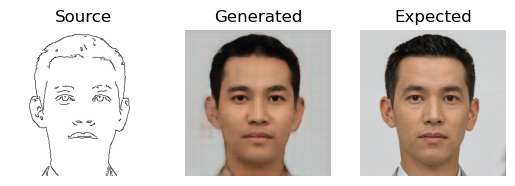

In [7]:
# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Source', 'Generated', 'Expected']
    # plot images row by row
    for i in range(len(images)):
        # define subplot
        pyplot.subplot(1, 3, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(images[i])
        # show title
        pyplot.title(titles[i])
    pyplot.show()
    
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input Image (1, 256, 256, 3)


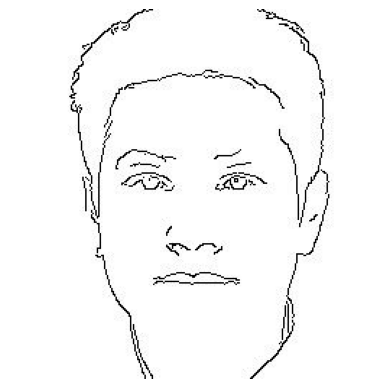

1/1 [==============================] - 0s 335ms/step
Generated Ouput (256, 256, 3)


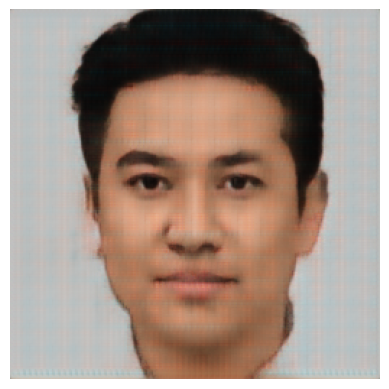

In [11]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import load
from numpy import expand_dims
from matplotlib import pyplot
import tensorflow as tf

def load_image(filename, size=(256,256)):
    # load image with the preferred size
    pixels = load_img(filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    # reshape to 1 sample
    pixels = expand_dims(pixels, 0)
    return pixels


src_image = load_image('whitetest.jpg')

src_image1 = tf.reshape(src_image, [256, 256, 3])
# scale from [-1,1] to [0,1]
scr_image1 = (src_image + 1) / 2.0
print('Input Image', src_image.shape)
# plot the image
pyplot.imshow(src_image1)
pyplot.axis('off')
pyplot.show()

# load model
model = load_model('model_004497.h5')

# generate image from source
gen_image = model.predict(src_image)

gen_image = tf.reshape(gen_image, [256, 256, 3])
# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0
print('Generated Ouput', gen_image.shape)
# plot the image
pyplot.imshow(gen_image)
pyplot.axis('off')
pyplot.show()

In [15]:
import torch
torch.cuda.is_available()

True